# Лабораторна робота №6

### Студента групи МІТ-31 (підгрупа 1)

### Добровольського Арсенія Михайловича

#### Мета: 
Розробка та тренування нейронної мережі для класифікації рукописних цифр набору даних MNIST.

#### Завдання:

1. **Завантажте набір даних MNIST**:
   - Використовуйте TensorFlow або інші джерела для отримання набору даних.

2. **Підготуйте дані для тренування**:
   - Нормалізуйте зображення та розділіть їх на тренувальні та тестувальні набори.

3. **Створіть нейронну мережу**:
   - Розробіть нейронну мережу з використанням повнозв'язних шарів.
   - Визначте архітектуру мережі: кількість шарів, нейронів, типи активаційних функцій.

4. **Тренуйте модель**:
   - Навчіть модель на тренувальному наборі даних.
   - Експериментуйте з різними оптимізаторами та іншими гіперпараметрами.

5. **Оцініть ефективність моделі**:
   - Використовуйте тестувальний набір даних для оцінки точності моделі.
   - Візуалізуйте деякі результати класифікації.


#### Some work with data

Training sample (data):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

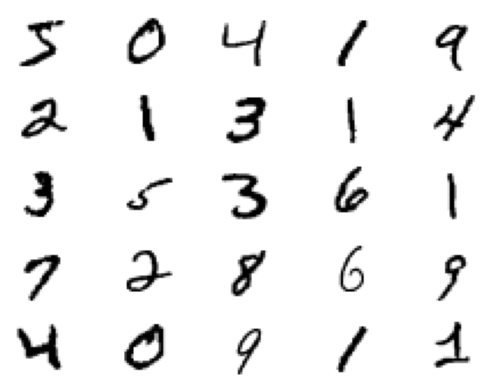

In [21]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Set random seed
tf.random.set_seed(42)

# Loading a dataset and splitting it into training and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Show the first training example
print(f"Training sample (data):\n{x_train[0]}\n")
print(f"Training label (class): {y_train[0]}")

# Check shape of the first example
print(f"\nShape of a single example: {x_train[0].shape}, {y_train[0].shape}")

# Displaying first 25 examples
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.axis(False)

#### Model based on non-normalized data

Min and max values before normalization: (0, 255)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.7139 - accuracy: 0.8755 - val_loss: 0.3735 - val_accuracy: 0.9211
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2838 - accuracy: 0.9319 - val_loss: 0.2679 - val_accuracy: 0.9299
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1984 - accuracy: 0.9462 - val_loss: 0.1920 - val_accuracy: 0.9493
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1649 - accuracy: 0.9543 - val_loss: 0.1994 - val_accuracy: 0.9477
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1414 - accuracy: 0.9608 - val_loss: 0.1574 - val_accuracy: 0.9586
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1176 - accuracy: 0.9663 - val_loss: 0.1660 - val_accuracy: 0.9594
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1056 

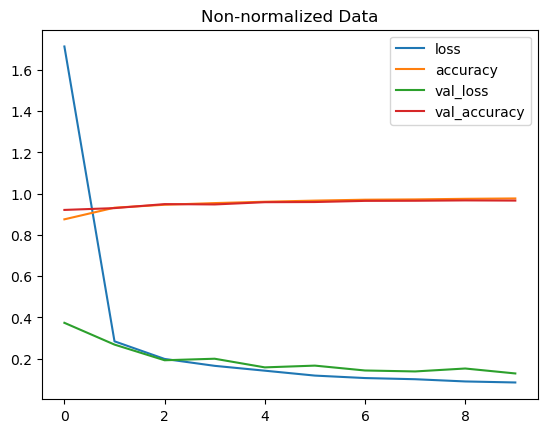

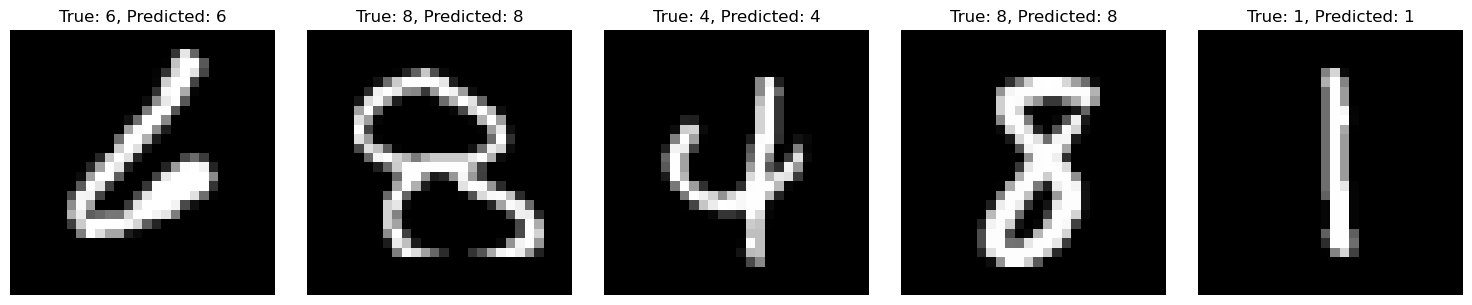

In [22]:
# Check the min and max values of the training data
print(f"Min and max values before normalization: {x_train.min(), x_train.max()}\n")

model = Sequential([
    Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

pd.DataFrame(history.history).plot(title="Non-normalized Data")

# Evaluate the model on test data
eval_result = model.evaluate(x_test, y_test)
print(f"Test accuracy: {eval_result[1]*100:.2f}%")

# Make predictions on test data
y_pred = model.predict(x_test)

# Visualize a few random predictions
import numpy as np

num_images = 5
random_indices = np.random.choice(range(len(x_test)), num_images)

plt.figure(figsize=(15, 3))

for i, index in enumerate(random_indices, 1):
    img = x_test[index]
    true_label = y_test[index]
    predicted_label = np.argmax(y_pred[index])

    plt.subplot(1, num_images, i)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis(False)

plt.tight_layout()
plt.show()

#### Model based on normalized data and an ideal learning rate

Min and max values after normalization: (0.0, 1.0)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2412 - accuracy: 0.9295 - val_loss: 0.1192 - val_accuracy: 0.9620 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1054 - accuracy: 0.9678 - val_loss: 0.1399 - val_accuracy: 0.9561 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0788 - accuracy: 0.9750 - val_loss: 0.0743 - val_accuracy: 0.9768 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0641 - accuracy: 0.9802 - val_loss: 0.0949 - val_accuracy: 0.9717 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0566 - accuracy: 0.9817 - val_loss: 0.0843 - val_accuracy: 0.9740 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0533 - accuracy: 0.9825 - val_loss: 0.0814 - val_accuracy: 0.9775 - lr: 0.0018
E

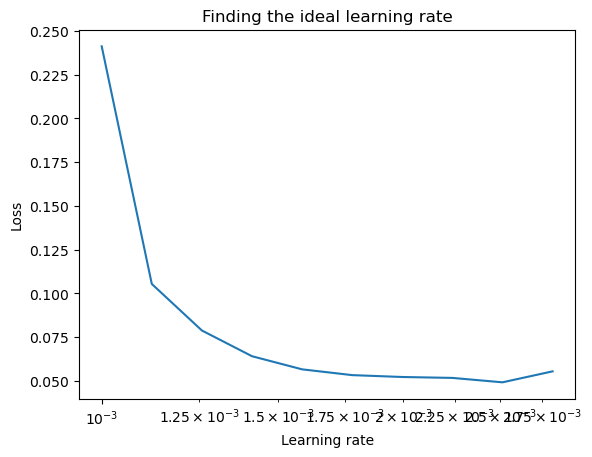

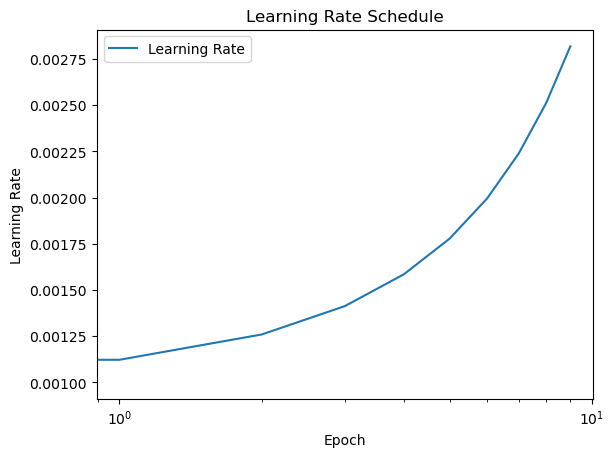

313/313 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.9740
Test accuracy: 97.40%
313/313 [==============================] - 1s 2ms/step


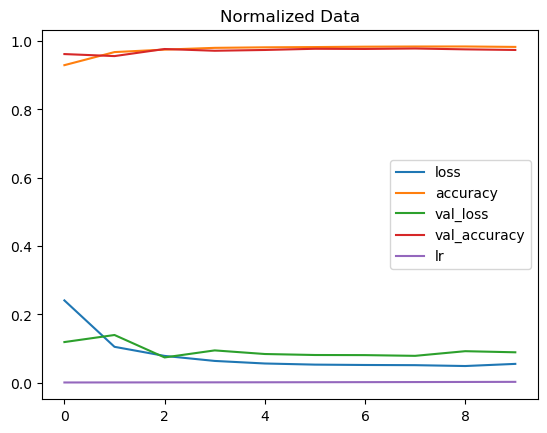

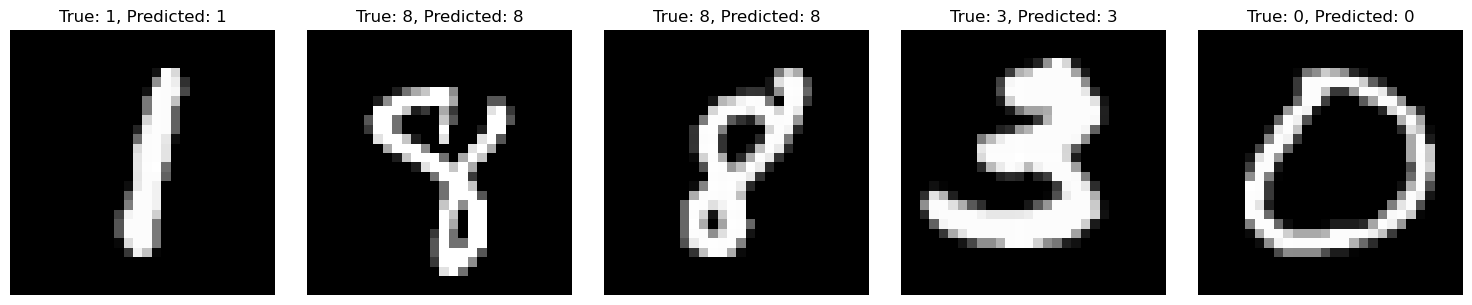

In [23]:
# Data normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Check the min and max values of the training data
print(f"Min and max values after normalization: {x_train.min(), x_train.max()}\n")

model_norm = Sequential([
    Flatten(input_shape=(28, 28)),  # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax") 
])

model_norm.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Creating the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

norm_history = model_norm.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[lr_scheduler])

# Plot the learning rate decay curve
import numpy as np
lrs = 1e-3 * 10**(np.arange(10)/20)
plt.semilogx(lrs, norm_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")
plt.show()

# Plot the learning rate schedule
plt.semilogx(lrs, label='Learning Rate')
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule")
plt.legend()
plt.show()

pd.DataFrame(norm_history.history).plot(title="Normalized Data")

# Evaluate the model on test data
eval_result_norm = model_norm.evaluate(x_test, y_test)
print(f"Test accuracy: {eval_result_norm[1]*100:.2f}%")

# Make predictions on test data
y_pred = model_norm.predict(x_test)

# Visualize a few random predictions
num_images = 5
random_indices = np.random.choice(range(len(x_test)), num_images)

plt.figure(figsize=(15, 3))

for i, index in enumerate(random_indices, 1):
    img = x_test[index]
    true_label = y_test[index]
    predicted_label = np.argmax(y_pred[index])

    plt.subplot(1, num_images, i)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis(False)

plt.tight_layout()
plt.show()

